# 3. ML models and Inferential Stats

3. ML : Predict sentiment analysis classification.  then compare multiclass classification models. to achieve better results, try to pre-train the models on BoW ? 
Careful : it needs to balance datasets in positive, neutral, negative sentiment
https://towardsdatascience.com/sentiment-classification-in-python-da31833da01b analyse complete avec comparaison de performances entre modèles

I am looking for answers to the questions :
- Can I detect highly engaging cities based on sentiment scores / rank2020 / Weight of Bow ? 
- Create a highly engaged tweets boolean variable on sentiment scores to check if these tweets have depending variables.
- Can I detect highly engaging cities using this highly engaged tweet variable ? beware of unbalance between cities. 


4. Probabilistic test (classification model of highly engaged citizens based on sentiment polarity + weight of BoW, can be used on bigger population than sample only ?)

In [34]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import re

from sklearn.feature_extraction.text import *
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# The most engaged tweets are those with the highest sentiment scores (neg,pos,compound, polarity, subjectivity)
- filter the most engaged tweets from smartcities100
- check for spread of highly engaged tweets by city_id

In [2]:
smartcities100 = pd.read_csv('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/smartcities100/smartcities100_.csv')

In [3]:
smartcities100.shape

(110850, 22)

In [4]:
smartcities100.head()

,tweetDate,content,twitterProfile,tweetUrl,timestamp,query,rank2020,tweet_len,num_words,stopwords,...,punctuation,hashtags,numerics,upper,neg,neu,pos,compound,polarity_tweet,subjectivity_tweet
0,Sun Jan 17 10:57:51 +0000 2021,A Delegation from @aau_ae visited @BurjeelMed...,https://twitter.com/Atatreh,https://twitter.com/Atatreh/status/13507592313...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,303,38,10,...,14,2,0,2,0.104,0.849,0.047,-0.5267,0.40,0.60
1,Thu Jan 14 17:40:03 +0000 2021,Wizz Air #AbuDhabi is set to launch flights to...,https://twitter.com/UAE_Forsan,https://twitter.com/UAE_Forsan/status/13497732...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,87,12,3,...,8,2,0,0,0.000,1.000,0.000,0.0000,0.00,0.00
2,Wed Jan 20 20:25:02 +0000 2021,What a great grappling exchange by both man #A...,https://twitter.com/RdosAnjosMMA,https://twitter.com/RdosAnjosMMA/status/135198...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,53,9,3,...,1,1,0,0,0.000,0.661,0.339,0.6249,0.80,0.75
3,Sun Jan 17 16:55:17 +0000 2021,Totally worth the 3.5 hour drive to #AbuDhabi ...,https://twitter.com/zoomnclick,https://twitter.com/zoomnclick/status/13508491...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,114,18,5,...,10,2,1,1,0.000,0.748,0.252,0.6590,0.30,0.10
4,Mon Jan 18 04:44:44 +0000 2021,Good morning #AbuDhabi Ireland 🇮🇪 vs UAE 🇦🇪 fi...,https://twitter.com/ChTahirmehmood,https://twitter.com/ChTahirmehmood/status/1351...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,91,12,0,...,7,2,0,1,0.000,0.791,0.209,0.4404,0.35,0.80


In [5]:
smartcities100['engaged_tweet'] = '0'
smartcities100['engaged_tweet'] = smartcities100['engaged_tweet'].apply(np.int64)
smartcities100['engaged_tweet'].head()

0    0
1    0
2    0
3    0
4    0
Name: engaged_tweet, dtype: int64

In [6]:
engaged_tweet = np.where((smartcities100['polarity_tweet']>=0.5) & 
                          (smartcities100['subjectivity_tweet']>=0.75))

In [7]:
smartcities100.loc[engaged_tweet].shape

(7574, 23)

7574 tweets on 110,850 represents 6,83% of my dataset

In [8]:
# replace 0 by 1 for engaged tweets
index_match = smartcities100.loc[engaged_tweet].index.tolist()
smartcities100.loc[index_match, 'engaged_tweet'] = 1
smartcities100.loc[engaged_tweet]['engaged_tweet'].head()

2     1
6     1
9     1
14    1
39    1
Name: engaged_tweet, dtype: int64

In [40]:
smartcities100.groupby('query')['engaged_tweet'].sum()

query
#AbuDhabi          80
#Abuja             65
#Amsterdam         60
#Ankara            13
#Athens            64
#Auckland          41
#Bangkok           58
#Barcelona         62
#Beijing           17
#Bengaluru         46
#Berlin            51
#Bilbao             6
#Birmingham         9
#Bogota            31
#Bologna           14
#Boston            61
#Bratislava        22
#Brisbane         156
#Brussels          12
#Bucharest          8
#Budapest          48
#BuenosAires       22
#Busan              2
#Cairo             12
#CapeTown          75
#Chengdu           18
#Chicago           47
#Chongqing          7
#Copenhaguen       28
#Denver            37
#Dubai             68
#Dublin            71
#Dusseldorf        23
#Geneva            44
#Gothenburg         8
#Guangzhou         11
#Hamburg           23
#Hangzhou           3
#Hanoi             10
#Hanover           10
#Helsinki          41
#HoChiMinh         35
#HongKong          38
#Hyderabad         69
#Jakarta            9
#Kie

# The most engaging cities are the ones with the most engaged tweets in their dataset
- aggregate the sum of engaged tweets by city
- calculate the average of engaged tweets by city (engaged tweets sum/num_tweets)
- check if the number of engaged tweets is correlated with smartcities ranking
- create a ranking of smartcities on the number of engaged tweets
- create a boolean value engaged_city based on the 20% cities having the highest number of engaged tweets

In [4]:
sc100_tomodel = pd.read_csv('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/smartcities100/sc100_tomodel.csv')

In [5]:
sc100_tomodel.head()

,rank2020,num_tweets,avg_tweet_len,avg_num_words,avg_stopwords,avg_num_sentences,avg_word_len,avg_punctuation,avg_hashtags,avg_numerics,avg_upper,avg_polarity,avg_subjectivity,avg_clean_word_len,avg_sma_bow,avg_civ_bow,avg_inf_bow,avg_sus_bow,avg_gov_bow,avg_ent_bow,engaged_tweet
0,1,567,152.694885,19.243386,4.135802,1.361552,7.453881,12.666667,3.943563,0.102293,0.901235,0.163718,0.377883,12.3,0.398589,0.292769,0.310406,0.176367,0.319224,0.687831,37
1,2,998,168.938878,19.813627,3.188377,1.675351,8.289540,12.923848,3.538076,0.259519,0.487976,0.078645,0.180721,11.7,0.202405,0.191383,0.205411,0.115230,0.190381,0.216433,41
2,3,485,193.839175,24.686598,4.107216,1.507216,7.275841,16.134021,6.389691,0.309278,0.764948,0.129053,0.275952,10.7,0.230928,0.226804,0.315464,0.080412,0.177320,0.282474,30
3,4,548,167.861314,22.379562,5.180657,1.419708,7.026564,13.151460,3.961679,0.377737,0.724453,0.217671,0.462777,11.5,0.335766,0.228102,0.291971,0.147810,0.171533,0.381387,41
4,5,1000,191.611000,25.104000,5.375000,1.648000,6.979791,15.615000,5.781000,0.200000,0.830000,0.151446,0.343924,10.8,0.419000,0.298000,0.438000,0.227000,0.314000,0.235000,78


In [34]:
# aggregate total engaged tweets by city
sc100_tomodel['engaged_tweets'] = smartcities100.groupby('rank2020')['engaged_tweet'].sum()

In [6]:
# calculate average number of engaged tweets by city
sc100_tomodel['engagement_score'] = sc100_tomodel['engaged_tweet']/sc100_tomodel['num_tweets']

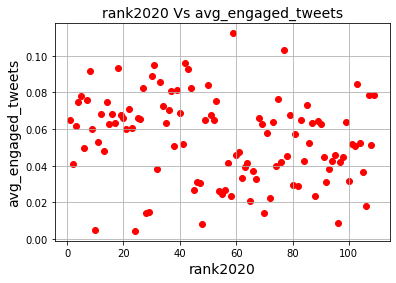

In [45]:
# plot relation between rank2020 and avg_engaged_tweets
plt.scatter(sc100_tomodel['rank2020'], sc100_tomodel['engagement_score'], color='red')
plt.title('rank2020 Vs engagement_score', fontsize=14)
plt.xlabel('rank2020', fontsize=14)
plt.ylabel('engagement_score', fontsize=14)
plt.grid(True)
plt.show()

## again, it seems like the smartcities ranking has no relationship with the number of engaged tweet in a city

In [7]:
sc100_tomodel.sort_values(by=['engagement_score'], ascending=False)

,rank2020,num_tweets,avg_tweet_len,avg_num_words,avg_stopwords,avg_num_sentences,avg_word_len,avg_punctuation,avg_hashtags,avg_numerics,avg_upper,avg_polarity,avg_subjectivity,avg_clean_word_len,avg_sma_bow,avg_civ_bow,avg_inf_bow,avg_sus_bow,avg_gov_bow,avg_ent_bow,engaged_tweet,engagement_score
58,59,6295,147.138681,18.966640,4.706116,1.522160,7.122731,12.526291,3.309611,0.161080,0.511517,0.217320,0.360651,11.8,0.361557,0.309929,0.342494,0.060683,0.287371,0.221604,707,0.112311
76,77,465,172.539785,21.772043,3.784946,1.372043,7.620231,14.141935,4.729032,0.172043,0.703226,0.178173,0.297968,11.5,0.292473,0.195699,0.511828,0.055914,0.204301,0.483871,48,0.103226
41,42,832,193.930288,25.002404,5.794471,1.435096,7.076026,14.016827,4.602163,0.278846,1.091346,0.189999,0.349085,11.2,0.371394,0.355769,0.402644,0.308894,0.372596,0.402644,80,0.096154
30,31,84,198.273809,23.964286,4.214286,1.404762,7.691525,17.059524,7.678571,0.297619,0.690476,0.200259,0.304935,11.2,0.297619,0.309524,0.464286,0.178571,0.107143,0.321429,8,0.095238
17,18,483,181.256729,23.987578,5.853002,1.548654,6.963481,13.776398,4.515528,0.217391,0.687371,0.222981,0.384012,11.4,0.300207,0.325052,0.347826,0.070393,0.178054,0.310559,45,0.093168
42,43,733,170.870396,22.351978,5.225102,1.447476,7.072329,13.085948,4.060027,0.345157,0.735334,0.203563,0.357150,11.9,0.234652,0.225102,0.319236,0.085948,0.238745,0.268759,68,0.092769
7,8,17337,144.509431,18.570918,3.997808,1.489646,7.214063,13.352079,4.205572,0.168311,0.673011,0.177446,0.330454,12.0,0.262618,0.220396,0.328373,0.062468,0.218319,0.164331,1589,0.091654
29,30,1000,158.880000,20.049000,4.283000,1.449000,7.560177,12.893000,4.065000,0.139000,0.924000,0.178517,0.335754,12.1,0.289000,0.247000,0.252000,0.106000,0.221000,0.250000,89,0.089000
32,33,117,181.042735,24.205128,5.068376,1.735043,6.934180,13.837607,4.794872,0.273504,1.333333,0.175546,0.327739,10.3,0.153846,0.299145,0.384615,0.076923,0.282051,0.547009,10,0.085470
102,103,886,196.944695,25.039503,5.814898,1.480813,7.220862,14.803612,5.031603,0.211061,0.697517,0.202211,0.397890,11.7,0.272009,0.232506,0.267494,0.139955,0.221219,0.329571,75,0.084650


In [14]:
sc100_tomodel = sc100_tomodel.sort_values(by=['engagement_score'], ascending=False).reset_index(drop=True)

In [15]:
sc100_tomodel['engagement_rank'] = np.arange(len(sc100_tomodel))

In [9]:
sc100_tomodel['engaged_city'] = '0'
sc100_tomodel['engaged_city'] = sc100_tomodel['engaged_city'].apply(np.int64)
sc100_tomodel['engaged_city'].head()

0    0
1    0
2    0
3    0
4    0
Name: engaged_city, dtype: int64

In [10]:
engaged_city = np.where((sc100_tomodel['engagement_score']>=0.075))

In [11]:
sc100_tomodel.loc[engaged_city].shape

(22, 24)

#### 22 on 109 cities are the most engaged. It means 20% of my population.

In [12]:
# replace 0 by 1 for engaged tweets
index_match = sc100_tomodel.loc[engaged_city].index.tolist()
sc100_tomodel.loc[index_match, 'engaged_city'] = 1
sc100_tomodel.loc[engaged_city]['engaged_city'].head()

4     1
6     1
7     1
13    1
17    1
Name: engaged_city, dtype: int64

In [42]:
sc100_tomodel

,rank2020,num_tweets,avg_tweet_len,avg_num_words,avg_stopwords,avg_num_sentences,avg_word_len,avg_punctuation,avg_hashtags,avg_numerics,avg_upper,avg_polarity,avg_subjectivity,avg_clean_word_len,avg_sma_bow,avg_civ_bow,avg_inf_bow,avg_sus_bow,avg_gov_bow,avg_ent_bow,engaged_tweet,engagement_score,engagement_rank,engaged_city
0,59,6295,147.138681,18.966640,4.706116,1.522160,7.122731,12.526291,3.309611,0.161080,0.511517,0.217320,0.360651,11.8,0.361557,0.309929,0.342494,0.060683,0.287371,0.221604,707,0.112311,0,1
1,77,465,172.539785,21.772043,3.784946,1.372043,7.620231,14.141935,4.729032,0.172043,0.703226,0.178173,0.297968,11.5,0.292473,0.195699,0.511828,0.055914,0.204301,0.483871,48,0.103226,1,1
2,42,832,193.930288,25.002404,5.794471,1.435096,7.076026,14.016827,4.602163,0.278846,1.091346,0.189999,0.349085,11.2,0.371394,0.355769,0.402644,0.308894,0.372596,0.402644,80,0.096154,2,1
3,31,84,198.273809,23.964286,4.214286,1.404762,7.691525,17.059524,7.678571,0.297619,0.690476,0.200259,0.304935,11.2,0.297619,0.309524,0.464286,0.178571,0.107143,0.321429,8,0.095238,3,1
4,18,483,181.256729,23.987578,5.853002,1.548654,6.963481,13.776398,4.515528,0.217391,0.687371,0.222981,0.384012,11.4,0.300207,0.325052,0.347826,0.070393,0.178054,0.310559,45,0.093168,4,1
5,43,733,170.870396,22.351978,5.225102,1.447476,7.072329,13.085948,4.060027,0.345157,0.735334,0.203563,0.357150,11.9,0.234652,0.225102,0.319236,0.085948,0.238745,0.268759,68,0.092769,5,1
6,8,17337,144.509431,18.570918,3.997808,1.489646,7.214063,13.352079,4.205572,0.168311,0.673011,0.177446,0.330454,12.0,0.262618,0.220396,0.328373,0.062468,0.218319,0.164331,1589,0.091654,6,1
7,30,1000,158.880000,20.049000,4.283000,1.449000,7.560177,12.893000,4.065000,0.139000,0.924000,0.178517,0.335754,12.1,0.289000,0.247000,0.252000,0.106000,0.221000,0.250000,89,0.089000,7,1
8,33,117,181.042735,24.205128,5.068376,1.735043,6.934180,13.837607,4.794872,0.273504,1.333333,0.175546,0.327739,10.3,0.153846,0.299145,0.384615,0.076923,0.282051,0.547009,10,0.085470,8,1
9,103,886,196.944695,25.039503,5.814898,1.480813,7.220862,14.803612,5.031603,0.211061,0.697517,0.202211,0.397890,11.7,0.272009,0.232506,0.267494,0.139955,0.221219,0.329571,75,0.084650,9,1


# Machine Learning Models

In [18]:
# define X-y
X = sc100_tomodel.drop(['engaged_city'], axis=1)
y = sc100_tomodel['engaged_city']

In [20]:
y.value_counts()

0    87
1    22
Name: engaged_city, dtype: int64

In [21]:
# over-sample y to balance dataset
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (109, 23)
Shape of X after SMOTE: (174, 23)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: engaged_city, dtype: float64

In [23]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.33, random_state = 100)

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
test_pred_lr = lr.predict(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
test_pred_knn = knn.predict(X_test)

In [26]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
test_pred_mlp = mlp.predict(X_test)

In [27]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
test_pred_svc = svc.predict(X_test)

In [28]:
# import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test_pred = [test_pred_lr, test_pred_knn, test_pred_mlp, test_pred_svc]

accuracy = []
f1 = []
auc = []
recall = []
precision = []
mae = []
mse = []
rmse = []
r2 =[]
vif = []

for pred in test_pred:
    accuracy.append(accuracy_score(y_test, pred))
    f1.append(f1_score(y_test, pred))
    auc.append(roc_auc_score(y_test, pred))
    recall.append(recall_score(y_test, pred))
    precision.append(precision_score(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))
    r2.append(r2_score(y_test, pred))
    vif.append(1/(1-r2_score(y_test, pred)))
    
results = pd.DataFrame(np.array([accuracy, f1, auc, recall, precision, mae, mse, rmse, r2, vif]), index=[['accuracy', 'f1', 'auc', 'recall', 'precision', 'mae', 'mse', 'rmse', 'r2', 'vif']], columns=['Logistic Regression','KNN Classifier','Multi-Layer Perceptron','Support Vector Machines']) 
print(results)

           Logistic Regression  KNN Classifier  Multi-Layer Perceptron  \
accuracy                   1.0        0.810345                0.603448   
f1                         1.0        0.845070                0.747253   
auc                        1.0        0.795343                0.520833   
recall                     1.0        0.882353                1.000000   
precision                  1.0        0.810811                0.596491   
mae                        0.0        0.189655                0.396552   
mse                        0.0        0.189655                0.396552   
rmse                       0.0        0.435494                0.629724   
r2                         1.0        0.218137               -0.634804   
vif                        inf        1.278997                0.611694   

           Support Vector Machines  
accuracy                  0.431034  
f1                        0.057143  
auc                       0.514706  
recall                    0.029412  


In [29]:
results.transpose()

,accuracy,f1,auc,recall,precision,mae,mse,rmse,r2,vif
Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,inf
KNN Classifier,0.810345,0.845070,0.795343,0.882353,0.810811,0.189655,0.189655,0.435494,0.218137,1.278997
Multi-Layer Perceptron,0.603448,0.747253,0.520833,1.000000,0.596491,0.396552,0.396552,0.629724,-0.634804,0.611694
Support Vector Machines,0.431034,0.057143,0.514706,0.029412,1.000000,0.568966,0.568966,0.754298,-1.345588,0.426332


Text(0.5, 0, 'accuracy measures')

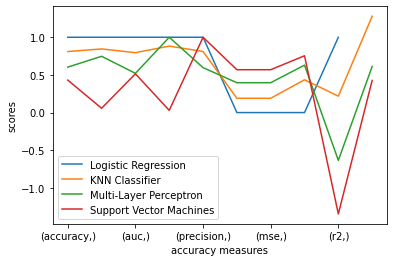

In [31]:
results.plot()
plt.ylabel('scores')
plt.xlabel('accuracy measures')

In [32]:
# confusion matrixes
from sklearn.metrics import confusion_matrix

for pred in test_pred:
    print(confusion_matrix(y_test, pred))

[[24  0]
 [ 0 34]]
[[17  7]
 [ 4 30]]
[[ 1 23]
 [ 0 34]]
[[24  0]
 [33  1]]


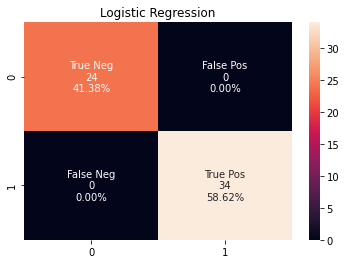

In [35]:
cnf_matrix1 = confusion_matrix(y_test, test_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix1.flatten()/np.sum(cnf_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix1, annot=labels, fmt='')
plt.title('Logistic Regression')
plt.show()

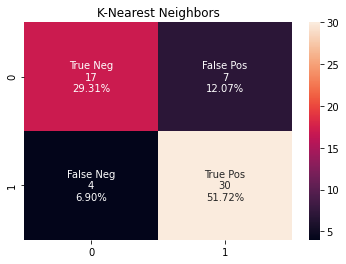

In [36]:
cnf_matrix2 = confusion_matrix(y_test, test_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix2.flatten()/np.sum(cnf_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix2, annot=labels, fmt='')
plt.title('K-Nearest Neighbors')
plt.show()

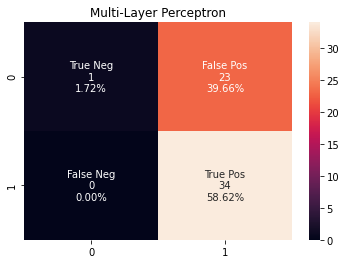

In [37]:
cnf_matrix3 = confusion_matrix(y_test, test_pred_mlp)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix3.flatten()/np.sum(cnf_matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix3, annot=labels, fmt='')
plt.title('Multi-Layer Perceptron')
plt.show()

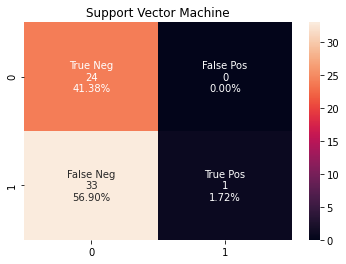

In [38]:
cnf_matrix4 = confusion_matrix(y_test, test_pred_svc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix4.flatten()/np.sum(cnf_matrix4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix4, annot=labels, fmt='')
plt.title('Support Vector Machine')
plt.show()

#### Linear Regression model achieves a too high score to be credible. Is it because we trained the model for it from the beginning ? feature selection etc ? or is it an error ? to determine. 

#### K-Nearest Neighbors have good performance

#### the two other ones make too much errors (false pos or neg)

# Inferential statistics

(array([ 7.,  6., 12., 18., 12., 27., 12.,  8.,  5.,  2.]),
 array([0.0044843 , 0.01526701, 0.02604972, 0.03683242, 0.04761513,
        0.05839783, 0.06918054, 0.07996324, 0.09074595, 0.10152865,
        0.11231136]),
 <a list of 10 Patch objects>)

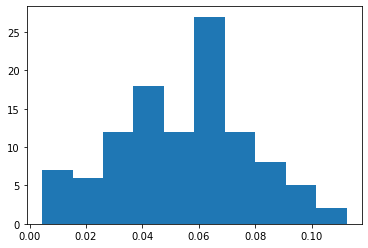

In [44]:
plt.hist(sc100_tomodel['engagement_score'])

In [43]:
import researchpy as rp
rp.summary_cont(sc100_tomodel['engagement_score'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,engagement_score,109.0,0.0546,0.0233,0.0022,0.0502,0.0591


In [ ]:
# I am looking for sample_std from my sample Taipei


In [ ]:
# Calculating T statistic for one sample t test
import math

pop_mean = 0.0546
sample_mean = 0.0916
sample_std = 
n = 17337
statistic = (sample_mean - pop_mean)/(sample_std/math.sqrt(n))
print("Statistic is: ", statistic)